## Равномерное распределение

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
from scipy.stats import randint

In [20]:
x = np.arange(1, 7)
disc_uni_dist = randint(1, 7)
pmf = disc_uni_dist.pmf(x)
print(pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [6]:
cdf = disc_uni_dist.cdf(x)
print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


In [7]:
x = np.arange(1, 251)
disc_uni_dist = randint(1,251)
cdf = disc_uni_dist.cdf(x)
print(cdf[49])

0.2


## Распределение Бернулли

In [8]:
from scipy.stats import bernoulli
import seaborn as sns

[Text(0.5, 0, 'Значение случайной величины'), Text(0, 0.5, 'Частота')]

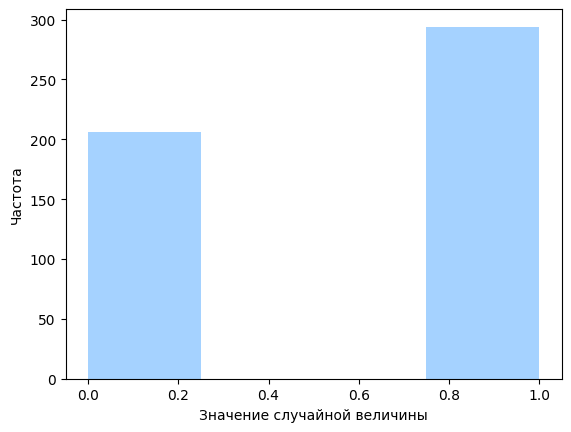

In [9]:
data = bernoulli.rvs(size=500,p=0.6)
ax = sns.distplot(data,
                  kde = False,
                  color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

In [10]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 206]
 [  1 294]]


## Биномиальное распределение

In [11]:
from numpy import random

<Axes: >

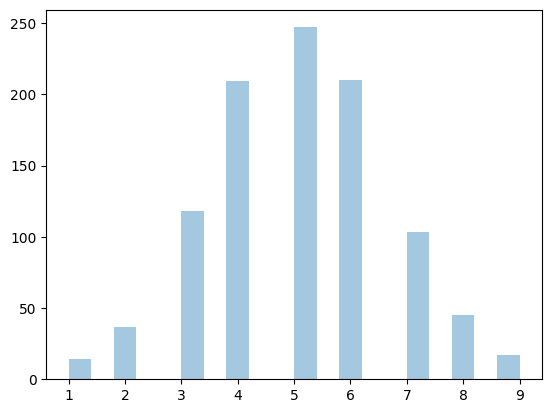

In [12]:
x = random.binomial(n=10, p=0.5, size=10)
sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)

## Распределение Пуассона

In [13]:
import scipy

Колл-центр получает в среднем 4.5 звонка за каждые пять минут. Каждый оператор может обработать один из этих вызовов в течение пяти минут. Если вызов получен, но оператор  не может его принять, то вызывающий абонент будет переведён в режим ожидания ответа.

Если вызовы следуют распределению Пуассона, какое минимальное количество операторов необходимо колл-центру, чтобы вероятность попадания вызова на удержание была не более 0.1?

In [14]:
scipy.stats.distributions.poisson.pmf(5, 4.5)

0.17082685848611215

In [23]:
callwait_cdf = 1
operators = 0
print('Итерации поиска решения:')
while callwait_cdf > 0.1:
    operators += 1
    callwait_cdf = 1-scipy.stats.distributions.poisson.cdf(operators, 4.5)
    print(f'Операторов: {operators}, Вероятность: {callwait_cdf:.3f}')
    
print('\nИтоговый результат:')
print(f'Необходимое количество операторов: {operators}')
print(f'Вероятность ожидания: {callwait_cdf:.3f}')

Итерации поиска решения:
Операторов: 1, Вероятность: 0.939
Операторов: 2, Вероятность: 0.826
Операторов: 3, Вероятность: 0.658
Операторов: 4, Вероятность: 0.468
Операторов: 5, Вероятность: 0.297
Операторов: 6, Вероятность: 0.169
Операторов: 7, Вероятность: 0.087

Итоговый результат:
Необходимое количество операторов: 7
Вероятность ожидания: 0.087


<Axes: >

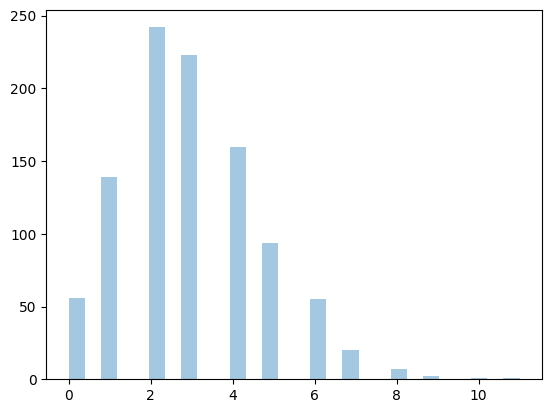

In [15]:
sns.distplot(random.poisson(lam=3, size=1000), kde=False)

### Задание 9.4
2 points possible (graded)
В среднем новый холодильник служит 10 лет. Предположим, что продолжительность времени службы распределена экспоненциально.

Ответы округлите до трёх знаков после точки-разделителя.

1. Какова вероятность того, что холодильник прослужит более 7 лет?
0.497
 
2. Какова вероятность того, что устройство прослужит от 9 до 11 лет?
0.074



### Задание 9.4
2 points possible (graded)
В среднем новый холодильник служит 10 лет. Предположим, что продолжительность времени службы распределена экспоненциально.

Ответы округлите до трёх знаков после точки-разделителя.

1. Какова вероятность того, что холодильник прослужит более 7 лет?
0.497
 
2. Какова вероятность того, что устройство прослужит от 9 до 11 лет?
0.074



## Вероятность срока службы холодильника при экспоненциальном распределении

Согласно условию задачи, срок службы нового холодильника подчиняется экспоненциальному распределению со средним значением $\mu = 10$ лет. Для решения задачи необходимо использовать свойства экспоненциального распределения, в частности, его кумулятивную функцию распределения (CDF).

Параметр скорости $\lambda$ экспоненциального распределения связан со средним значением $\mu$ соотношением:
$$\lambda = \frac{1}{\mu}$$
В данном случае, $\lambda = \frac{1}{10} = 0.1$ лет$^{-1}$.

Кумулятивная функция распределения (CDF) для экспоненциального распределения определяется как:
$$F(x) = P(X \le x) = 1 - e^{-\lambda x}, \quad \text{для } x \ge 0$$
где $X$ — случайная величина, представляющая срок службы холодильника.

Вероятность того, что случайная величина $X$ превысит значение $x$, рассчитывается как:
$$P(X > x) = 1 - P(X \le x) = 1 - F(x) = 1 - (1 - e^{-\lambda x}) = e^{-\lambda x}$$

Вероятность того, что случайная величина $X$ находится в интервале от $a$ до $b$, рассчитывается как:
$$P(a \le X \le b) = F(b) - F(a) = (1 - e^{-\lambda b}) - (1 - e^{-\lambda a}) = e^{-\lambda a} - e^{-\lambda b}$$

Применим эти формулы для решения поставленных задач.

### 1. Вероятность того, что холодильник прослужит более 7 лет

Необходимо найти вероятность $P(X > 7)$. Используя формулу для $P(X > x)$:
$$P(X > 7) = e^{-\lambda \times 7} = e^{-0.1 \times 7} = e^{-0.7}$$

### 2. Вероятность того, что устройство прослужит от 9 до 11 лет

Необходимо найти вероятность $P(9 \le X \le 11)$. Используя формулу для $P(a \le X \le b)$:
$$P(9 \le X \le 11) = e^{-\lambda \times 9} - e^{-\lambda \times 11} = e^{-0.1 \times 9} - e^{-0.1 \times 11} = e^{-0.9} - e^{-1.1}$$

### Решение на Python

Для вычисления значений вероятностей и их округления до трёх знаков после точки используем Python:

**Результаты вычислений:**

1. Вероятность того, что холодильник прослужит более 7 лет: 0.497
2. Вероятность того, что устройство прослужит от 9 до 11 лет: 0.074

In [32]:
import math

# Средний срок службы (лет)
mean_lifespan = 10

# Параметр скорости lambda
lambda_param = 1 / mean_lifespan

# 1. Вероятность того, что холодильник прослужит более 7 лет
prob_more_than_7 = math.exp(-lambda_param * 7)

# 2. Вероятность того, что устройство прослужит от 9 до 11 лет
prob_between_9_and_11 = math.exp(-lambda_param * 9) - math.exp(-lambda_param * 11)

# Округление до трёх знаков после точки
rounded_prob_more_than_7 = round(prob_more_than_7, 3)
rounded_prob_between_9_and_11 = round(prob_between_9_and_11, 3)

print(f"1. Вероятность того, что холодильник прослужит более 7 лет: {rounded_prob_more_than_7}")
print(f"2. Вероятность того, что устройство прослужит от 9 до 11 лет: {rounded_prob_between_9_and_11}")

1. Вероятность того, что холодильник прослужит более 7 лет: 0.497
2. Вероятность того, что устройство прослужит от 9 до 11 лет: 0.074


### Задание 10.1
1 point possible (graded)
В вашем офисе стоят два автомата, с кофе и с чаем. Вероятность того, что к концу дня ваши коллеги выпьют весь кофе, равна  0.2 . Для чая соответствующая вероятность равна  0.3 .

Найдите вероятность того, что хотя бы в одном из автоматов закончится напиток.

Решим эту задачу по теории вероятностей.

**События:**
* Событие A: Кофе закончился к концу дня. $P(A) = 0.2$
* Событие B: Чай закончился к концу дня. $P(B) = 0.3$

Нам нужно найти вероятность того, что *хотя бы в одном* из автоматов закончится напиток. Это означает, что закончится кофе, или закончится чай, или закончится и кофе, и чай. В терминах теории вероятностей это вероятность объединения событий A и B, то есть $P(A \cup B)$.

Общая формула для вероятности объединения двух событий:
$P(A \cup B) = P(A) + P(B) - P(A \cap B)$
где $P(A \cap B)$ — вероятность одновременного наступления событий A и B (закончился и кофе, и чай).

Предполагаем, что события "кофе закончился" и "чай закончился" независимы (завершение одного не влияет на завершение другого). В таком случае вероятность их одновременного наступления равна произведению их отдельных вероятностей:
$P(A \cap B) = P(A) \times P(B)$

Подставляем известные значения:
$P(A \cap B) = 0.2 \times 0.3 = 0.06$

Теперь используем формулу для объединения событий:
$P(A \cup B) = P(A) + P(B) - P(A \cap B)$
$P(A \cup B) = 0.2 + 0.3 - 0.06$
$P(A \cup B) = 0.5 - 0.06$
$P(A \cup B) = 0.44$

**Альтернативный способ (через дополнительное событие):**
Событие, противоположное "хотя бы в одном закончится напиток", — это "ни в одном из автоматов не закончится напиток".
Вероятность, что кофе НЕ закончится: $P(\text{не A}) = 1 - P(A) = 1 - 0.2 = 0.8$
Вероятность, что чай НЕ закончится: $P(\text{не B}) = 1 - P(B) = 1 - 0.3 = 0.7$

Если события A и B независимы, то события "не A" и "не B" также независимы. Вероятность того, что НЕ закончится ни кофе, ни чай:
$P(\text{не A} \cap \text{не B}) = P(\text{не A}) \times P(\text{не B}) = 0.8 \times 0.7 = 0.56$

Вероятность "хотя бы в одном закончится напиток" является дополнением к вероятности "ни в одном не закончится напиток":
$P(A \cup B) = 1 - P(\text{не A} \cap \text{не B}) = 1 - 0.56 = 0.44$

Оба способа дают одинаковый результат.

**Ответ:**

Вероятность того, что хотя бы в одном из автоматов закончится напиток, равна 0.44.

### Задание 10.2
1 point possible (graded)
Вы находитесь на благотворительном мероприятии и приобрели один билет для участия в розыгрыше.

Вам сообщают, что на мероприятии будет 200 человек (включая вас), и примерно  3/4  участников мероприятия приобрели билеты на розыгрыш. Из этих людей равное количество купило один, два и три билета соответственно.

Если основываться на этих оценках и предполагать, что победитель будет только один, какова вероятность того, что вы выиграете? Ответ округлите до трёх знаков после точки-разделителя.

Рассчитаем вероятность нашего выигрыша, исходя из предоставленных данных.

1.  **Определим количество участников, купивших билеты:**
    Всего людей на мероприятии: 200
    Доля купивших билеты: 3/4
    Количество людей, купивших билеты: $200 \times \frac{3}{4} = 150$ человек.

2.  **Определим, сколько людей купили 1, 2 и 3 билета:**
    Эти 150 человек разделились поровну на три группы: купившие 1, 2 и 3 билета.
    Количество людей в каждой группе: $\frac{150}{3} = 50$ человек.

3.  **Рассчитаем общее количество проданных билетов:**
    Группа 1 (по 1 билету): 50 человек $\times$ 1 билет/человек = 50 билетов
    Группа 2 (по 2 билета): 50 человек $\times$ 2 билета/человек = 100 билетов
    Группа 3 (по 3 билета): 50 человек $\times$ 3 билета/человек = 150 билетов
    Общее количество проданных билетов: $50 + 100 + 150 = 300$ билетов.

4.  **Определим вероятность вашего выигрыша:**
    Вы купили 1 билет.
    Победитель только один, и он выбирается случайным образом из всех проданных билетов.
    Вероятность вашего выигрыша = (Количество ваших билетов) / (Общее количество проданных билетов)
    Вероятность = $\frac{1}{300}$

5.  **Округлим результат до трёх знаков после точки:**
    $\frac{1}{300} \approx 0.003333...$
    Округляем до 0.003.

**Ответ:**

Вероятность того, что вы выиграете, составляет примерно 0.003.

### Задание 10.4
1 point possible (graded)

Согласно прогнозу погоды на завтра, с вероятностью 50 % будет дождь в Пекине, с вероятностью 30 % — в Рио-де-Жанейро и с вероятностью 20 % — в Найроби.

Какова вероятность того, что завтра ни в одном из трёх указанных городов не будет дождя?

Поскольку эти три города находятся далеко друг от друга, предположим, что случаи дождя в этих городах независимы.

P (B) = 0.5
P (R) = 0.3
P (N) = 0.2

P (not B and not R and not N ) = (1-0.5)*(1-0.3)*(1-0.2) = 

In [33]:
p = (1-0.5)*(1-0.3)*(1-0.2)
p

0.27999999999999997

Решим эту задачу по теории вероятностей.

**События и их вероятности:**
* Событие П: Дождь в Пекине. $P(П) = 0.50$
* Событие Р: Дождь в Рио-де-Жанейро. $P(Р) = 0.30$
* Событие Н: Дождь в Найроби. $P(Н) = 0.20$

Нам нужно найти вероятность того, что завтра ни в одном из этих городов не будет дождя. Это означает, что дождя не будет в Пекине И не будет в Рио-де-Жанейро И не будет в Найроби.

Сначала найдем вероятности противоположных событий (отсутствие дождя в каждом городе):
* Событие не-П: Нет дождя в Пекине. $P(\text{не-П}) = 1 - P(П) = 1 - 0.50 = 0.50$
* Событие не-Р: Нет дождя в Рио-де-Жанейро. $P(\text{не-Р}) = 1 - P(Р) = 1 - 0.30 = 0.70$
* Событие не-Н: Нет дождя в Найроби. $P(\text{не-Н}) = 1 - P(Н) = 1 - 0.20 = 0.80$

Поскольку погодные условия в разных, значительно удаленных городах, как правило, считаются независимыми событиями (если нет информации об обратном, например, о влиянии глобального климатического явления), мы можем предположить их независимость.

Для независимых событий вероятность их совместного наступления (что ни в одном городе не будет дождя) равна произведению вероятностей каждого отдельного события:
$P(\text{нет дождя нигде}) = P(\text{не-П}) \times P(\text{не-Р}) \times P(\text{не-Н})$

Подставляем значения:
$P(\text{нет дождя нигде}) = 0.50 \times 0.70 \times 0.80$
$P(\text{нет дождя нигде}) = 0.35 \times 0.80$
$P(\text{нет дождя нигде}) = 0.28$

**Ответ:**

Вероятность того, что завтра ни в одном из трёх указанных городов не будет дождя, составляет 0.28.